In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn import model_selection
from sklearn.model_selection import train_test_split

import warnings
import joblib
import datetime

import tqdm
# from tqdm.notebook import tqdm

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
'''Generic method to load saved object in a file to object using pickle.'''
def load_pickle_to_obj(filename):
    obj = None
    with open(filename, 'rb') as f:
        obj=pickle.load(f)
    return obj

In [4]:
X_train_after_feature_engg_file="X_train_feature_enggineered_df.pkl"
y_train_file="y_train.pkl"
X_test_after_feature_engg_file="X_test_feature_enggineered_df.pkl"
y_test_file="y_test.pkl"

X_train=load_pickle_to_obj(X_train_after_feature_engg_file)
y_train=load_pickle_to_obj(y_train_file)
X_test=load_pickle_to_obj(X_test_after_feature_engg_file)
y_test=load_pickle_to_obj(y_test_file)

In [5]:
X_train.shape, X_test.shape

((99198, 35), (42514, 35))

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99198 entries, 12846 to 43567
Data columns (total 35 columns):
reassignment_count                   99198 non-null object
reopen_count                         99198 non-null object
sys_mod_count                        99198 non-null object
impact                               99198 non-null object
urgency                              99198 non-null object
priority                             99198 non-null object
caller_id_num                        99198 non-null object
sys_updated_by_num                   99198 non-null object
location_num                         99198 non-null object
category_num                         99198 non-null object
subcategory_num                      99198 non-null object
closed_code_num                      99198 non-null object
resolved_by_num                      99198 non-null object
incident_state_Awaiting Evidence     99198 non-null object
incident_state_Awaiting Problem      99198 non-null object
in

In [7]:
float_data_type_features=['reassignment_count', 'reopen_count', 'sys_mod_count','sys_updated_at_ms']
int_data_type_features=['impact','urgency','priority','caller_id_num','sys_updated_by_num','location_num', 
'category_num', 'subcategory_num', 'closed_code_num', 'resolved_by_num', 'incident_state_Awaiting Evidence',
'incident_state_Awaiting Problem','incident_state_Awaiting User Info',
'incident_state_Awaiting Vendor', 'incident_state_Closed','incident_state_New',
'incident_state_Resolved','active_True','made_sla_True', 'contact_type_Email','contact_type_IVR',
'contact_type_Phone', 'contact_type_Self service','knowledge_True','u_priority_confirmation_True',
'notify_Send Email','sys_created_by_num','u_symptom_num','opened_by_num', 'assignment_group_num','assigned_to_num']

In [8]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
for col in float_data_type_features:
    X_train[col]=X_train[col].astype("float64")
    X_test[col]=X_test[col].astype("float64")
    
for col in int_data_type_features:
    X_train[col]=X_train[col].astype("int64")
    X_test[col]=X_test[col].astype("int64")

In [9]:
X_train

,reassignment_count,reopen_count,sys_mod_count,impact,urgency,priority,caller_id_num,sys_updated_by_num,location_num,category_num,...,contact_type_Self service,knowledge_True,u_priority_confirmation_True,notify_Send Email,sys_updated_at_ms,sys_created_by_num,u_symptom_num,opened_by_num,assignment_group_num,assigned_to_num
12846,-0.636268,-0.105307,-0.658175,1,1,2,2001,214,204,37,...,1,1,1,1,-1.076930,52,4,108,25,58
16096,-0.636268,-0.105307,-0.658175,1,1,2,2895,908,204,40,...,1,1,1,1,-1.056181,34,444,59,70,192
52740,-0.059340,-0.105307,0.247074,1,1,2,1727,908,46,23,...,1,1,1,1,-0.141211,13,470,24,72,123
135624,-0.059340,4.695363,0.376395,1,1,2,4131,745,204,57,...,1,1,1,1,0.946789,130,491,305,56,167
55379,0.517588,-0.105307,0.247074,1,1,2,2691,777,161,46,...,1,1,1,1,-0.165095,20,589,40,10,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,-0.059340,-0.105307,0.117753,1,1,2,3149,16,204,53,...,1,1,1,1,-0.682195,10,491,17,66,203
97639,-0.059340,-0.105307,-0.140890,1,1,2,4416,915,204,34,...,1,1,1,1,0.225768,10,491,17,70,13
95939,-0.636268,-0.105307,-0.658175,1,1,2,4713,908,143,42,...,1,1,1,1,0.199965,62,534,239,70,126
117952,-0.636268,-0.105307,-0.399533,1,1,2,4512,908,143,42,...,1,1,1,1,0.691605,199,491,460,23,215


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99198 entries, 12846 to 43567
Data columns (total 35 columns):
reassignment_count                   99198 non-null float64
reopen_count                         99198 non-null float64
sys_mod_count                        99198 non-null float64
impact                               99198 non-null int64
urgency                              99198 non-null int64
priority                             99198 non-null int64
caller_id_num                        99198 non-null int64
sys_updated_by_num                   99198 non-null int64
location_num                         99198 non-null int64
category_num                         99198 non-null int64
subcategory_num                      99198 non-null int64
closed_code_num                      99198 non-null int64
resolved_by_num                      99198 non-null int64
incident_state_Awaiting Evidence     99198 non-null int64
incident_state_Awaiting Problem      99198 non-null int64
incident_st

<h3>Custom Ensemble Regressor</h3>

In [9]:
# https://github.com/smit8800/Equipment-Failure-prediction-Using-ML-for-Stripper-Wells/blob/master/Custom_ensamble_Classifer.ipynb

In [70]:
##meta data generator from the No of k models for given dataset.

def Meta_Data_Generator(data, models, desc, K):
    predictions = []
#     print("data",data)
#     print("models",models)
# , desc='meta_data_'+str(desc)+'_when_k='+str(K)
    for idx in tqdm.tqdm(range(len(data)), position=0, ncols = 80,leave = True, desc='meta_data_'+str(desc)+'_when_k='+str(K)):
        pred = []
        for k in range(len(models)):
            pred.append(models[k].predict(data[idx].reshape(1, -1))[0])
        predictions.append(pred)
    return np.array(predictions)

In [79]:
def custom_ensembler(kx, X_train, y_train, X_test,y_test):
    
    X_tr = X_train.iloc[:, 1:].values
    y_tr = np.array(list(map(int, y_train.values))).reshape(-1,1)
    
    X_te = X_test.iloc[:, 1:].values
    y_te = np.array(list(map(int, y_test.values))).reshape(-1,1)
    
    # D1-D2 Split
    D1_x, D2_x, D1_y, D2_y = train_test_split(
        X_tr, y_tr, test_size=0.50
    )

    # Train the K regressor for D1 set
    K = kx
    models = []
#     ,  desc='K='+str(K)
    for i in tqdm.tqdm(range(K), leave = True, ncols = 80,position=0 , desc='when K='+str(K)):
        # Samling with replacment
        sample_x, _, sample_y, _ = train_test_split(
            D1_x, D1_y, test_size=0.50
        )
        model = DecisionTreeRegressor(max_depth=100)
        model.fit(sample_x, sample_y)
        models.append(model)

    # Prepare thr Dataset for Meta Model by Generating the Meta-Data from k models by passing the D2 set
    meta_data = pd.DataFrame(Meta_Data_Generator(D2_x, models, "D2", K))
    meta_data["target"] = D2_y
    
    print('Fitting RandomForestRegressor for K=',K)
    # Trainng the meta Model
    meta_model = RandomForestRegressor(n_estimators=100, max_depth=100, n_jobs=16, random_state=0)
    meta_model.fit(meta_data.iloc[:, :-1].values, meta_data.iloc[:, -1].values)

    # Getting the Predictions for Test set and then Calcukating the "Micro-F1-Score".
    meta_test = Meta_Data_Generator(X_te, models, "test",K)
    y_true = y_te
    pred_y = meta_model.predict(meta_test)
    print('-'*100)
    return mean_squared_error(y_true, pred_y), y_true, pred_y

In [80]:
%%time
score1 = {}
for k in tqdm.tqdm([5, 10, 50, 100, 200, 500, 1000], position=0):
    score1[k], _, _ = custom_ensembler(k, X_train, y_train, X_test,y_test)

meta_data_D2_when_k=5: 100%|████████████| 49599/49599 [00:09<00:00, 5130.60it/s]


Fitting RandomForestRegressor for K= 5


when K=10:   0%|                                         | 0/10 [00:00<?, ?it/s]         | 1/7 [00:21<02:11, 21.84s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=10: 100%|███████████| 49599/49599 [00:19<00:00, 2561.41it/s]


Fitting RandomForestRegressor for K= 10


when K=50:   0%|                                         | 0/50 [00:00<?, ?it/s]         | 2/7 [01:05<02:52, 34.43s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=50: 100%|████████████| 49599/49599 [01:37<00:00, 507.16it/s]


Fitting RandomForestRegressor for K= 50


when K=100:   0%|                                       | 0/100 [00:00<?, ?it/s]        | 3/7 [04:38<07:44, 116.03s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=100: 100%|███████████| 49599/49599 [03:15<00:00, 253.50it/s]


Fitting RandomForestRegressor for K= 100


when K=200:   0%|                                       | 0/200 [00:00<?, ?it/s]        | 4/7 [11:44<11:55, 238.53s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=200: 100%|███████████| 49599/49599 [06:31<00:00, 126.75it/s]


Fitting RandomForestRegressor for K= 200


when K=500:   0%|                                       | 0/500 [00:00<?, ?it/s]        | 5/7 [25:58<15:21, 460.56s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=500: 100%|████████████| 49599/49599 [16:24<00:00, 50.38it/s]


Fitting RandomForestRegressor for K= 500


 86%|████████████████████████████████████████████████████████████████████▌           | 6/7 [1:02:16<17:24, 1044.29s/it]

----------------------------------------------------------------------------------------------------


meta_data_D2_when_k=1000: 100%|███████████| 49599/49599 [33:10<00:00, 24.92it/s]


Fitting RandomForestRegressor for K= 1000


meta_data_test_when_k=1000: 100%|█████████| 42514/42514 [28:05<00:00, 25.22it/s]


----------------------------------------------------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [2:14:57<00:00, 1156.73s/it]

Wall time: 2h 14min 57s


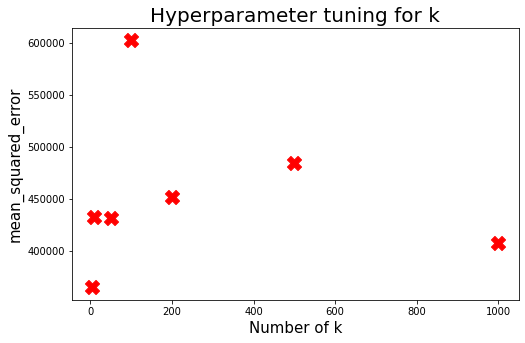

In [81]:
##Plotting the results of Hyperparameter Tuning 

fig = plt.figure(figsize=(8,5))
plt.scatter(score1.keys(), score1.values(), marker='X', c='r', s=200)
plt.title("Hyperparameter tuning for k", fontsize=20)
plt.xlabel("Number of k", fontsize=15)
plt.ylabel("mean_squared_error", fontsize=15)
plt.show()

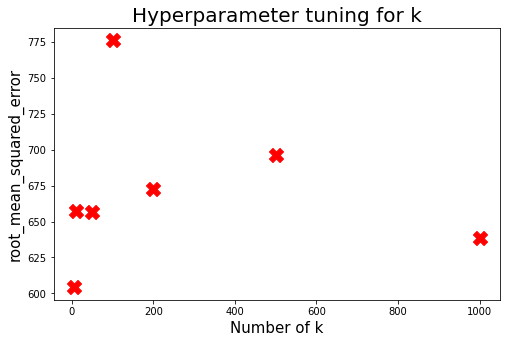

In [82]:
##Plotting the results of Hyperparameter Tuning 

fig = plt.figure(figsize=(8,5))
plt.scatter(score1.keys(), np.sqrt(list(score1.values())), marker='X', c='r', s=200)
plt.title("Hyperparameter tuning for k", fontsize=20)
plt.xlabel("Number of k", fontsize=15)
plt.ylabel("root_mean_squared_error", fontsize=15)
plt.show()

In [91]:
%%time
score, y_true, pred_y = custom_ensembler(5, X_train, y_train, X_test,y_test)
print("best No of K = ",5,"mean_square_error = ", score)

meta_data_D2_when_k=5: 100%|████████████| 49599/49599 [00:09<00:00, 5103.97it/s]


Fitting RandomForestRegressor for K= 5


meta_data_test_when_k=5: 100%|██████████| 42514/42514 [00:08<00:00, 4946.39it/s]


----------------------------------------------------------------------------------------------------
best No of K =  5 mean_square_error =  376710.5813150415
Wall time: 21.9 s


In [90]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["No", "No of K", "Mean Squared Error"]
for idx in range(7):
    x.add_row([idx+1, list(score1.keys())[idx], list(score1.values())[idx]])
print(x)

+----+---------+--------------------+
| No | No of K | Mean Squared Error |
+----+---------+--------------------+
| 1  |    5    | 364969.28790191555 |
| 2  |    10   | 432295.44119249884 |
| 3  |    50   | 431266.2497194587  |
| 4  |   100   | 602238.5477912856  |
| 5  |   200   |  451961.623692036  |
| 6  |   500   |  484703.521044345  |
| 7  |   1000  | 407433.5311710937  |
+----+---------+--------------------+
